# Step 1

I imported the necessary modules and bring in the inverse function for later

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

# Step 2 

I read in iris and remove the prefix to for formatting,and then outputs the head to verify that the data looks complete, which it does


In [2]:
data = pd.read_csv('iris.txt')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3

This step uses pandas DataFrame to create a reduced data set containing just PetalLength and PetalWidth and then print the head again to verify everything is correct

In [3]:
petal_data = pd.DataFrame(data, columns = ['PetalLength','PetalWidth'])
petal_data.head()

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Step 4

I create a scatter plot of the reduced data set to verify that there aren't outliers or anomalies.

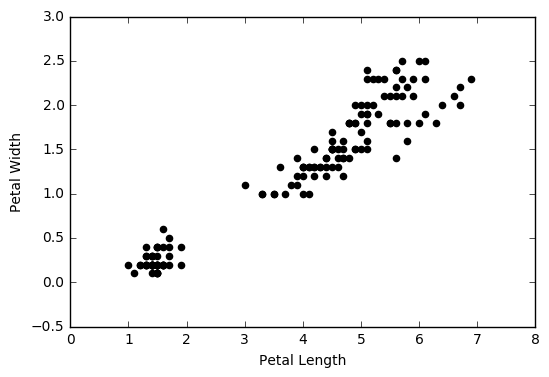

In [11]:
x = petal_data['PetalLength'].values
y = petal_data['PetalWidth'].values

plt.scatter(x, y, color = 'black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Step 5

I created the function find_beta to read in the reduced data set, do some transformations which are explained and then returns a calculated beta  β̂ = inverse(transpose(X) * X) * transpose(X) * y,

The function y_predict will then solve use x and beta to predict a y

In [12]:
def find_beta(petal_data):
    x = petal_data['PetalLength'].values
    y = petal_data['PetalWidth'].values
    
    # Create an array of ones to be joined with x in order to complete calculations
    ones = np.ones(len(petal_data))
    x_ones = np.stack((ones, x), axis = 1)
    
    # Transpose x and use it to find the dot products for x and y 
    x_transpose = np.transpose(x_ones)
    x_dot = np.dot(x_transpose,x_ones)
    y_dot = np.dot(x_transpose,y)
    
    # Use the inverse function from linalg and multiplies it by x_dot to get an identity matrix for x
    x_inverse = inv(x_dot)
    x_id = np.dot(x_dot,x_inverse)
    
    # Calculate beta
    beta = np.dot(x_inverse,y_dot)
    return beta

def y_predict(x,beta):
    y = beta[0]+(x*beta[1])
    return y

# Step 6

This step runs the created regression model functions using the reduced data set to predict points along the regression line, adds them as a column to the reduced data set, and prints the head to ensure everything is in order

In [13]:
beta = find_beta(petal_data)
petal_data['Predicted Value'] = y_predict(x,beta)
petal_data.head()

,PetalLength,PetalWidth,Predicted Value
0,1.4,0.2,0.216473
1,1.4,0.2,0.216473
2,1.3,0.2,0.174831
3,1.5,0.2,0.258115
4,1.4,0.2,0.216473


# Step 7

Now that I have a regression line, I add it to the scatter plot from above

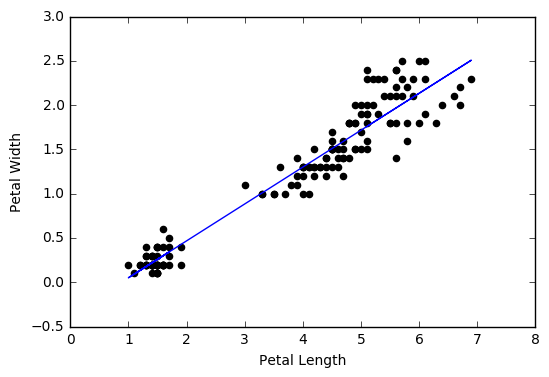

In [14]:
reg_line = petal_data['Predicted Value'].values

plt.scatter(x, y, color = 'black')
plt.plot(x,reg_line, color = 'blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')